<a href="https://colab.research.google.com/github/edutavr/electromech-conversion/blob/main/Eletromec_Desafio_1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando dependências

In [206]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## AWG American wire gauge

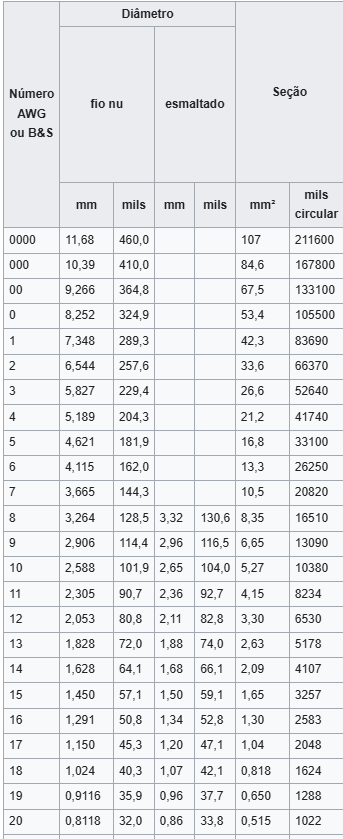

Referência: https://pt.wikipedia.org/wiki/Escala_americana_de_bitolas_de_fios

In [2]:
awg_metric_system = {
    "AWG": [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    "area": [42.4, 33.6, 26.7, 21.2, 16.8, 13.3, 10.5, 8.37, 6.63, 5.26, 4.17, 3.31, 2.62, 2.08, 1.65, 1.31, 1.04, 0.823, 0.653, 0.518, 0.410, 0.326, 0.258]
}

In [3]:
df_awg = pd.DataFrame(awg_metric_system)

In [4]:
df_awg

,AWG,area
0,1,42.400
1,2,33.600
2,3,26.700
3,4,21.200
4,5,16.800
5,6,13.300
6,7,10.500
7,8,8.370
8,9,6.630
9,10,5.260


## Funções auxiliares

In [7]:
def initialize_parameters(W2, V2, V1):

    if W2.isdigit() & V2.isdigit() & V1.isdigit():
        if int(W2) > 800:
            print('Potência de saída do transformador é maior do que 800 VA. Não é possível usar lâminas padronizadas')
            laminas_padrozinadas = False
        else:
            print('A potência de saída do transformador é menor do que 800 VA. É possível utilizar as lâminas padronizadas')
            laminas_padrozinadas = True
        return laminas_padrozinadas
    else:
        print('Os valores inseridos não são dígitos...')
        return

In [8]:
def first_and_second_current(W2,V2,V1):
    Is = (W2/V2)

    #A Pontência primária é calculada a partir do aumento em 10% da potência secundária
    W1 = 1.1 * W2
    Ip = (W1/V1)

    return Is,Ip

In [9]:
def conductor_section(current,W2):
    if W2 <= 500:
        print("Menor ou igual a 500")
        return round((current/3),1)
    elif W2 > 500 & W2 <= 1000:
        print("Maior que 500 e menor que 1000")
        return  round((current/2.5),1)
    elif W2 > 1000 & W2 <= 3000:
        print("Maior que 1000 e menor que 3000")
        return round((current/2),1)
    else:
        return "Potência fora do range limite recomendado"

In [45]:
def bitola(condutor_area):
    row = df_awg[df_awg['area'] > condutor_area]
    if not row.empty:
        awg = row.iloc[-1]['AWG']
        area = row.iloc[-1]['area']
        return float(awg), float(area)
    else:
        return

In [96]:
def magnectic_section(potency, frequency,is_long_cable,is_two_primary_circuits=False,is_two_secondary_circuits=False):
    if is_two_primary_circuits is False and is_two_secondary_circuits is False:
        standard_cables = 7.5*(math.sqrt(potency/frequency))
        long_cables = 6.5*(math.sqrt(potency/frequency))
        if is_long_cable:
            return long_cables
        return standard_cables

    if is_two_primary_circuits is True and is_two_secondary_circuits is False:
        standard_cables = 7.5*(math.sqrt(1.25*potency/frequency))
        long_cables = 6*(math.sqrt(1.25*potency/frequency))

        if is_long_cable:
            return long_cables
        return standard_cables

    if is_two_primary_circuits is True and is_two_secondary_circuits is True:
        standard_cables = 7.5*(math.sqrt(1.5*potency/frequency))
        long_cables = 6*(math.sqrt(1.5*potency/frequency))

        if is_long_cable:
            return long_cables
        return standard_cables

    print('Inválido')
    return [0, 0]

In [69]:
def core_geometric_section_1(magnetic_section):
    return magnetic_section*1.1

In [13]:
def calculate_a_and_b_geometric_section(geometric_section,a):
    b = geometric_section/a
    return b

In [14]:
def core_geometric_section(length, width):
    return length*width

In [15]:
def core_magnetic_section(length, width):
    return core_geometric_section(length, width)/1.1

In [196]:
def calculate_turns_number(tension, core_ms,first=True):
    if first == True:
      temp_turn_1 = round((40/core_ms),1)
      turns = round(temp_turn_1*tension)
      return turns
    else:
      temp_turn_1 = round((40/core_ms),1)
      temp_turn_2 = round((temp_turn_1*tension),1)
      turns = round(temp_turn_2*1.1)
      return turns

In [17]:
def blades_qtd(b:float,acesita:float):
  return round((b*0.9)/acesita)

In [18]:
def blade_type(a):
    if a == 1.5:
        return "Lãmina tipo 0"
    elif a == 2:
        return "Lãmina tipo 1"
    elif a == 2.5:
        return "Lãmina tipo 2"
    elif a == 3:
        return "Lãmina tipo 3"
    elif a == 3.5:
        return "Lãmina tipo 4"
    elif a == 4:
        return "Lãmina tipo 5"
    elif a == 5:
        return "Lâmina tipo 6"
    else:
        return "Lãmina não encontrada"

In [251]:
def dimensions_core(a,b,second_potency):
    if(second_potency>800):
        largura=3*a
        altura=4*a
        comprimento=b
        seção_janela=(0.5*a*1.5*a)*100
        volume= ((largura*altura) - (0.5*a*3*a*2))*b*0.9 ## cm³
        peso = volume*7.8


        return ("\nA Largura é: "+str(largura)+"cm\n" +
                "A Altura é: "+str(altura)+"cm\n" +
                "O Comprimento é: "+str(comprimento)+"cm\n" +
                "A Seção da janela é: "+str(seção_janela)+"mm²\n"+
                "O Volume é: "+str(volume)+"cm³\n"
                "Peso é:" + str(peso)+ 'g')
    else:
        largura=3*a
        altura=2.5*a
        comprimento=b
        seção_janela=(0.5*a*1.5*a)*100
        volume= ((largura*altura) - (0.5*a*3*a*2))*b*0.9
        peso = volume*7.8


        return ("\nA Largura é: "+str(largura)+"cm\n" +
                "A Altura é: "+str(altura)+"cm\n" +
                "O Comprimento é: "+str(comprimento)+"cm\n" +
                "A Seção da janela é: "+str(seção_janela)+"mm²\n"+
                "O Volume é: "+str(volume)+"cm³\n"
                "Peso é: " + str(peso)+ 'g')

## Parâmetros do transformador

In [159]:
W2 = 300
V1 = 120
V2 = 220
frequency = 50
espessura = 0.035
bm = 11300

#Sistema

In [221]:
first_current, second_current = first_and_second_current(W2,V2,V1)

In [222]:
W1 = round(1.1 * W2)

In [223]:
section_1 = conductor_section(first_current, W2)
section_2 = conductor_section(second_current, W2)

Menor ou igual a 500
Menor ou igual a 500


In [224]:
numero_bitola_1, section_1_bitola = bitola(section_1)
numero_bitola_2, section_2_bitola = bitola(section_2)

In [225]:
magnetic_section = magnectic_section(W1,frequency,False)
geometric_section = core_geometric_section_1(magnetic_section)

In [226]:
if(W2>800):
  print("Uso das laminas Compridas pois a potencia é maior que 800VA")
else:
  print("Uso das laminas padronizadas pois a potencia é menor que 800VA")

Uso das laminas padronizadas pois a potencia é menor que 800VA


In [227]:
a = round(math.sqrt(geometric_section))
blade = blade_type(a)
b = round(calculate_a_and_b_geometric_section(geometric_section,a))

In [228]:
core_gs = core_geometric_section(a, b)
core_ms = round(core_magnetic_section(a, b),1)
n1 = calculate_turns_number(V1, core_ms)
n2 = calculate_turns_number(V2, core_ms,first=False)

In [252]:
dimensions= dimensions_core(a,b,W2)
qtd_blades= blades_qtd(b,espessura)

In [253]:
print("Número de Espiras do Enrolamento Primário: ", n1)
print("Número de Espiras do Enrolamento Secundário: ", n2)
print("Bitola do cabo primário: ", section_1_bitola)
print("Bitola do cabo secundário: ", section_2_bitola)
print("Tipo de lâmina: ", blade)
print("Quantidade de lâminas: ", qtd_blades)
print("Dimensões: ",dimensions)

Número de Espiras do Enrolamento Primário:  264
Número de Espiras do Enrolamento Secundário:  532
Bitola do cabo primário:  0.518
Bitola do cabo secundário:  1.04
Tipo de lâmina:  Lâmina tipo 6
Quantidade de lâminas:  103
Dimensões:  
A Largura é: 15cm
A Altura é: 12.5cm
O Comprimento é: 4cm
A Seção da janela é: 1875.0mm²
O Volume é: 405.0cm³
Peso é: 3159.0g
